# Desease Pridiction Deep Neural Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset and Visualize

In [2]:
train = pd.read_csv('./Dataset/training.csv')
test = pd.read_csv('./Dataset/testing.csv')

train.shape,test.shape

((4920, 134), (42, 133))

In [3]:
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [4]:
train['Unnamed: 133'].unique()

array([nan])

In [5]:
train.drop(columns=['Unnamed: 133'],inplace=True)

In [6]:
df = pd.concat([train,test])
df.shape

(4962, 133)

In [7]:
prognosis_col = df['prognosis'].unique()
prognosis_col

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

### Label Encoder

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
# to convert target column into a interger type
le = LabelEncoder()
prog_le = le.fit_transform(df['prognosis'])
prog_le

array([15, 15, 15, ..., 35, 27, 15])

In [10]:
prog_le.shape,df['prognosis'].shape

((4962,), (4962,))

In [11]:
prog = pd.DataFrame(prog_le,columns=['Prognosis'])
prog['Prog_obj'] = df['prognosis'].values

In [12]:
prog['Prog_obj'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [13]:
prog['Prognosis'].unique()

array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
       11, 37, 40, 19, 20, 21, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
       31,  5,  0,  2, 38, 35, 27])

In [14]:
len(prog['Prog_obj'].unique()),len(prog['Prognosis'].unique())

(41, 41)

In [15]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [16]:
prog['Prognosis'].unique(),prog['Prog_obj'].unique()

(array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
        11, 37, 40, 19, 20, 21, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
        31,  5,  0,  2, 38, 35, 27]),
 array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
        'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
        'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
        'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
        'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
        'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
        'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
        'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
        'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
        'Osteoarthristis', 'Arthritis',
        '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
        'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=objec

In [17]:
prog.head()

,Prognosis,Prog_obj
0,15,Fungal infection
1,15,Fungal infection
2,15,Fungal infection
3,15,Fungal infection
4,15,Fungal infection


### Visualization with maps

In [18]:
df.isnull().sum().sum()

0

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4962 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.1+ MB


In [20]:
df['prognosis'] = prog['Prognosis']
df.shape

(4962, 133)

In [21]:
df['prognosis'].head(10)

0    15
1    15
2    15
3    15
4    15
5    15
6    15
7    15
8    15
9    15
Name: prognosis, dtype: int32

c:\Program Files\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


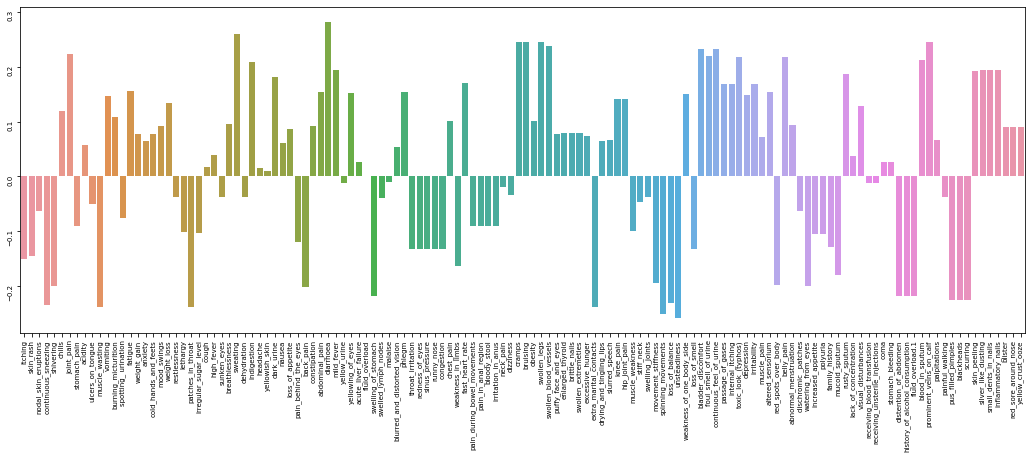

In [22]:
# correlation of each parameter
plt.figure(figsize=(18,6))

x = df.drop(columns='prognosis')
y = x.corrwith(df['prognosis'])
ax = sns.barplot(x.columns,y)
ax.tick_params(labelsize=7,labelrotation=90)

In [23]:
for i in df.columns:
    if len(df[i].unique())<2:
        print(i ,'  ' ,df[i].unique())

fluid_overload    [0]


In [24]:
df = df.drop(columns=['fluid_overload'])

In [25]:

def uni(col_name):
    apt_1 = []
    apt_0 = []
    for i in range(df.shape[0]):
        if df[col_name].values[i]==1:
            apt_1.append(1)
        else:
            apt_0.append(0)
    return print(col_name,' ','0 :',len(apt_0),' 1 :',len(apt_1),'\n')

In [26]:
for i in df.columns:
    uni(i)

itching   0 : 4277  1 : 685 

skin_rash   0 : 4168  1 : 794 

nodal_skin_eruptions   0 : 4853  1 : 109 

continuous_sneezing   0 : 4738  1 : 224 

shivering   0 : 4853  1 : 109 

chills   0 : 4157  1 : 805 

joint_pain   0 : 4272  1 : 690 

stomach_pain   0 : 4738  1 : 224 

acidity   0 : 4738  1 : 224 

ulcers_on_tongue   0 : 4853  1 : 109 

muscle_wasting   0 : 4853  1 : 109 

vomiting   0 : 3031  1 : 1931 

burning_micturition   0 : 4744  1 : 218 

spotting_ urination   0 : 4853  1 : 109 

fatigue   0 : 3013  1 : 1949 

weight_gain   0 : 4847  1 : 115 

anxiety   0 : 4847  1 : 115 

cold_hands_and_feets   0 : 4847  1 : 115 

mood_swings   0 : 4732  1 : 230 

weight_loss   0 : 4502  1 : 460 

restlessness   0 : 4732  1 : 230 

lethargy   0 : 4502  1 : 460 

patches_in_throat   0 : 4853  1 : 109 

irregular_sugar_level   0 : 4847  1 : 115 

cough   0 : 4393  1 : 569 

high_fever   0 : 3588  1 : 1374 

sunken_eyes   0 : 4853  1 : 109 

breathlessness   0 : 4508  1 : 454 

sweating   0 

In [27]:
df.shape[0]

4962

In [28]:
# sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linewidth=1)

In [29]:
high_corr = df.corr()
high_corr_fe = high_corr.index[abs(high_corr['prognosis']<0.1)]
high_corr_fe,len(high_corr_fe)

(Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
        'shivering', 'stomach_pain', 'acidity', 'ulcers_on_tongue',
        'muscle_wasting', 'spotting_ urination', 'weight_gain', 'anxiety',
        'cold_hands_and_feets', 'mood_swings', 'restlessness', 'lethargy',
        'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever',
        'sunken_eyes', 'breathlessness', 'dehydration', 'headache',
        'yellowish_skin', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes',
        'back_pain', 'constipation', 'yellow_urine', 'acute_liver_failure',
        'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise',
        'blurred_and_distorted_vision', 'throat_irritation', 'redness_of_eyes',
        'sinus_pressure', 'runny_nose', 'congestion', 'weakness_in_limbs',
        'pain_during_bowel_movements', 'pain_in_anal_region', 'bloody_stool',
        'irritation_in_anus', 'neck_pain', 'dizziness', 'puffy_face_and_eyes',
        'enlarged_thyroid

In [30]:
# df = df.drop(columns=high_corr_fe)

In [31]:
# df['itching']

In [32]:
list(df.columns)

['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering',
 'chills',
 'joint_pain',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'vomiting',
 'burning_micturition',
 'spotting_ urination',
 'fatigue',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'lethargy',
 'patches_in_throat',
 'irregular_sugar_level',
 'cough',
 'high_fever',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'headache',
 'yellowish_skin',
 'dark_urine',
 'nausea',
 'loss_of_appetite',
 'pain_behind_the_eyes',
 'back_pain',
 'constipation',
 'abdominal_pain',
 'diarrhoea',
 'mild_fever',
 'yellow_urine',
 'yellowing_of_eyes',
 'acute_liver_failure',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'malaise',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'chest_pain',
 'weakness_in_limbs

### Model Fitting

In [33]:
# spliting
from sklearn.model_selection import train_test_split

In [34]:
xtrain = df.drop(columns=['prognosis'])
ytrain = df['prognosis']

In [35]:
lst = []
for i in df.columns:
    if i not in lst:
        lst.append(i)

lst

['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering',
 'chills',
 'joint_pain',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'vomiting',
 'burning_micturition',
 'spotting_ urination',
 'fatigue',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'lethargy',
 'patches_in_throat',
 'irregular_sugar_level',
 'cough',
 'high_fever',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'headache',
 'yellowish_skin',
 'dark_urine',
 'nausea',
 'loss_of_appetite',
 'pain_behind_the_eyes',
 'back_pain',
 'constipation',
 'abdominal_pain',
 'diarrhoea',
 'mild_fever',
 'yellow_urine',
 'yellowing_of_eyes',
 'acute_liver_failure',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'malaise',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'chest_pain',
 'weakness_in_limbs

In [36]:
x_train,x_test,y_train,y_test = train_test_split(xtrain,ytrain,test_size=0.18,random_state=0)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((4068, 131), (4068,), (894, 131), (894,))

In [39]:
# x_test_ = x_test.to_csv('x_test_.csv')
# y_test_ = y_test.to_csv('y_test_.csv')

In [33]:
short = np.sort(y_test.unique())
short

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40])

### Standard Scaler

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
sc = StandardScaler()
sc.fit(x_train)

x_train_sc = sc.transform(x_train)
x_test_sc  = sc.transform(x_test)

## Model Building Using Machine Learning Techniques:

### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr = LogisticRegression()
lr.fit(x_train_sc,y_train)
y_pred = lr.predict(x_test_sc)

c:\program files\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
from sklearn.metrics import accuracy_score, classification_report,mean_squared_error

In [39]:
acc = accuracy_score(y_test,y_pred)
acc

0.9932885906040269

In [40]:
mean_squared_error(y_test,y_pred)

1.487695749440716

### Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train_sc,y_train)

y_pred_dtc = dtc.predict(x_test_sc)

In [43]:
accuracy_score(y_test,y_pred_dtc)

0.9932885906040269

In [44]:
mean_squared_error(y_test,y_pred_dtc)

1.487695749440716

### Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)

In [47]:
accuracy_score(y_test,y_pred_rfc)

0.9932885906040269

### KNeighbors Classifier

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
accuracy_score(y_test,y_pred_knn)

0.9932885906040269

### SGDclassifier

In [50]:
from sklearn.linear_model import SGDClassifier

In [51]:
sgd = SGDClassifier()
sgd.fit(x_train,y_train)
y_pred_sgd = sgd.predict(x_test)
accuracy_score(y_test,y_pred_sgd)

0.9932885906040269

In [52]:
# cross val score
from sklearn.model_selection import cross_val_score

### Report And Analysis

In [53]:
cv=cross_val_score(sgd,df.drop(columns=['prognosis']),df['prognosis'],cv=50)
cv

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.96969697, 0.93939394, 0.8989899 , 0.8989899 , 0.87878788])

In [54]:
cv.mean()

0.9917171717171714

In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_sgd)

array([[15,  0,  0, ...,  0,  0,  0],
       [ 0, 25,  0, ...,  0,  0,  0],
       [ 0,  0, 23, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 16,  0,  0],
       [ 0,  0,  0, ...,  0, 14,  0],
       [ 0,  0,  0, ...,  0,  0, 25]], dtype=int64)

In [56]:
print(classification_report(y_test,y_pred_sgd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        23
           3       0.96      1.00      0.98        22
           4       1.00      0.96      0.98        26
           5       0.96      1.00      0.98        25
           6       1.00      1.00      1.00        19
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        19
           9       1.00      0.96      0.98        23
          10       1.00      1.00      1.00        22
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        24
          13       1.00      1.00      1.00        15
          14       1.00      1.00      1.00        27
          15       1.00      1.00      1.00        16
          16       1.00      0.84      0.91        25
          17       1.00    

### Save Model

In [58]:
import pickle

In [60]:
pickle.dump(sgd,open('desease_model.pickle','wb'))

In [61]:
model = pickle.load(open('desease_model.pickle','rb'))

In [62]:
y_pred_model = model.predict(x_test)

In [65]:
accuracy_score(y_test,y_pred_model)

0.9932885906040269

# Project End